#CMS - Healthcare Analysis

### CMS
CMS is the federal agency that provides health coverage to more than 160 million through Medicare, Medicaid, the Children's Health Insurance Program, and the Health Insurance Marketplace. CMS works in partnership with the entire health care community to improve quality, equity and outcomes in the health care system.

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [44]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

### HCAHPS File handling

#### HCAHPS
HCAHPS stands for the **Hospital Consumer Assessment of Healthcare Providers and Systems**. It is a national survey that measures patients' perceptions of their care during a recent inpatient hospital stay, and the results are publicly reported to help people compare hospitals. The survey is used by the Centers for Medicare and Medicaid Services (CMS) to assess patient satisfaction and also affects hospital reimbursement.

In [45]:
hcahps= pd.read_csv("/content/HCAHPS-Hospital.csv")

In [46]:
hcahps.shape

(445563, 22)

In [47]:
hcahps.head()

,Facility ID,Facility Name,Address,City/Town,State,ZIP Code,County/Parish,Telephone Number,HCAHPS Measure ID,HCAHPS Question,HCAHPS Answer Description,Patient Survey Star Rating,Patient Survey Star Rating Footnote,HCAHPS Answer Percent,HCAHPS Answer Percent Footnote,HCAHPS Linear Mean Value,Number of Completed Surveys,Number of Completed Surveys Footnote,Survey Response Rate Percent,Survey Response Rate Percent Footnote,Start Date,End Date
0,010001,SOUTHEAST HEALTH MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,(334) 793-8701,H_COMP_1_A_P,"Patients who reported that their nurses ""Alway...","Nurses ""always"" communicated well",Not Applicable,NaN,75,NaN,Not Applicable,627,NaN,17,NaN,01/01/2024,12/31/2024
1,010001,SOUTHEAST HEALTH MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,(334) 793-8701,H_COMP_1_SN_P,"Patients who reported that their nurses ""Somet...","Nurses ""sometimes"" or ""never"" communicated well",Not Applicable,NaN,6,NaN,Not Applicable,627,NaN,17,NaN,01/01/2024,12/31/2024
2,010001,SOUTHEAST HEALTH MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,(334) 793-8701,H_COMP_1_U_P,"Patients who reported that their nurses ""Usual...","Nurses ""usually"" communicated well",Not Applicable,NaN,19,NaN,Not Applicable,627,NaN,17,NaN,01/01/2024,12/31/2024
3,010001,SOUTHEAST HEALTH MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,(334) 793-8701,H_COMP_1_LINEAR_SCORE,Nurse communication - linear mean score,Nurse communication - linear mean score,Not Applicable,NaN,Not Applicable,NaN,90,627,NaN,17,NaN,01/01/2024,12/31/2024
4,010001,SOUTHEAST HEALTH MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,(334) 793-8701,H_COMP_1_STAR_RATING,Nurse communication - star rating,Nurse communication - star rating,3,NaN,Not Applicable,NaN,Not Applicable,627,NaN,17,NaN,01/01/2024,12/31/2024


In [48]:
hcahps.describe()

,ZIP Code
count,445563.000000
mean,54114.258192
std,26956.222954
min,603.000000
25%,33021.000000
50%,55705.000000
75%,76132.000000
max,99929.000000


In [49]:
hcahps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 445563 entries, 0 to 445562
Data columns (total 22 columns):
 #   Column                                 Non-Null Count   Dtype 
---  ------                                 --------------   ----- 
 0   Facility ID                            445563 non-null  object
 1   Facility Name                          445563 non-null  object
 2   Address                                445563 non-null  object
 3   City/Town                              445563 non-null  object
 4   State                                  445563 non-null  object
 5   ZIP Code                               445563 non-null  int64 
 6   County/Parish                          445563 non-null  object
 7   Telephone Number                       445563 non-null  object
 8   HCAHPS Measure ID                      445563 non-null  object
 9   HCAHPS Question                        445563 non-null  object
 10  HCAHPS Answer Description              445563 non-null  object
 11  

In [50]:
cols= ["Patient Survey Star Rating",
    "HCAHPS Answer Percent",
    "HCAHPS Linear Mean Value",
    "Number of Completed Surveys",
    "Survey Response Rate Percent"]
hcahps[cols] = hcahps[cols].apply(pd.to_numeric, errors='coerce')

###Observation
  Due to the presence of "Not Available" at Numerical columns earlier, it is now converted as null.

In [51]:
hcahps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 445563 entries, 0 to 445562
Data columns (total 22 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   Facility ID                            445563 non-null  object 
 1   Facility Name                          445563 non-null  object 
 2   Address                                445563 non-null  object 
 3   City/Town                              445563 non-null  object 
 4   State                                  445563 non-null  object 
 5   ZIP Code                               445563 non-null  int64  
 6   County/Parish                          445563 non-null  object 
 7   Telephone Number                       445563 non-null  object 
 8   HCAHPS Measure ID                      445563 non-null  object 
 9   HCAHPS Question                        445563 non-null  object 
 10  HCAHPS Answer Description              445563 non-null  

In [52]:
hcahps.isnull().sum()

,0
Facility ID,0
Facility Name,0
Address,0
City/Town,0
State,0
ZIP Code,0
County/Parish,0
Telephone Number,0
HCAHPS Measure ID,0
HCAHPS Question,0


<Axes: >

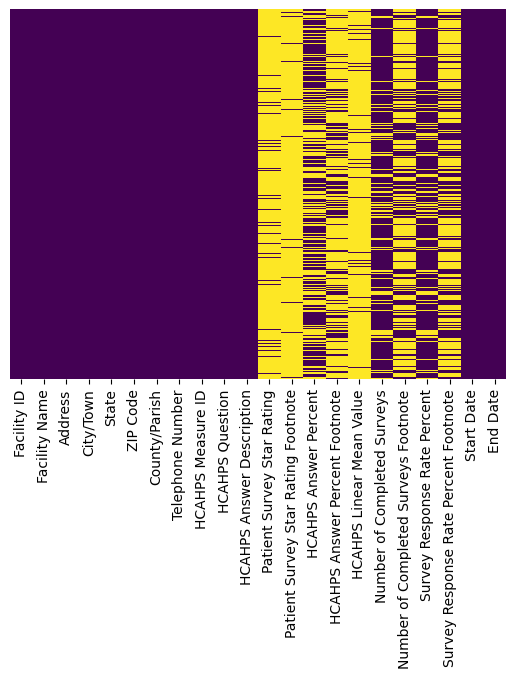

In [53]:
sns.heatmap(hcahps.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [121]:
#null_columns = [col for col in hcahps.columns if hcahps[col].isnull().sum() > 0]
#for col in null_columns:
    #print(f"Column: {col}")
    #print(hcahps[col].value_counts(dropna=True))
    #print("-------------------------------------------------------")


In [55]:
hcahps.drop(columns=['Patient Survey Star Rating Footnote','HCAHPS Answer Percent Footnote','Number of Completed Surveys Footnote',
                     'Survey Response Rate Percent Footnote'],inplace=True)
hcahps.columns

Index(['Facility ID', 'Facility Name', 'Address', 'City/Town', 'State',
       'ZIP Code', 'County/Parish', 'Telephone Number', 'HCAHPS Measure ID',
       'HCAHPS Question', 'HCAHPS Answer Description',
       'Patient Survey Star Rating', 'HCAHPS Answer Percent',
       'HCAHPS Linear Mean Value', 'Number of Completed Surveys',
       'Survey Response Rate Percent', 'Start Date', 'End Date'],
      dtype='object')

In [56]:
hcahps.head()

,Facility ID,Facility Name,Address,City/Town,State,ZIP Code,County/Parish,Telephone Number,HCAHPS Measure ID,HCAHPS Question,HCAHPS Answer Description,Patient Survey Star Rating,HCAHPS Answer Percent,HCAHPS Linear Mean Value,Number of Completed Surveys,Survey Response Rate Percent,Start Date,End Date
0,010001,SOUTHEAST HEALTH MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,(334) 793-8701,H_COMP_1_A_P,"Patients who reported that their nurses ""Alway...","Nurses ""always"" communicated well",NaN,75.0,NaN,627.0,17.0,01/01/2024,12/31/2024
1,010001,SOUTHEAST HEALTH MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,(334) 793-8701,H_COMP_1_SN_P,"Patients who reported that their nurses ""Somet...","Nurses ""sometimes"" or ""never"" communicated well",NaN,6.0,NaN,627.0,17.0,01/01/2024,12/31/2024
2,010001,SOUTHEAST HEALTH MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,(334) 793-8701,H_COMP_1_U_P,"Patients who reported that their nurses ""Usual...","Nurses ""usually"" communicated well",NaN,19.0,NaN,627.0,17.0,01/01/2024,12/31/2024
3,010001,SOUTHEAST HEALTH MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,(334) 793-8701,H_COMP_1_LINEAR_SCORE,Nurse communication - linear mean score,Nurse communication - linear mean score,NaN,NaN,90.0,627.0,17.0,01/01/2024,12/31/2024
4,010001,SOUTHEAST HEALTH MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,(334) 793-8701,H_COMP_1_STAR_RATING,Nurse communication - star rating,Nurse communication - star rating,3.0,NaN,NaN,627.0,17.0,01/01/2024,12/31/2024


In [57]:
hcahps[hcahps.duplicated()].shape

(0, 18)

In [58]:
hcahps.describe()

,ZIP Code,Patient Survey Star Rating,HCAHPS Answer Percent,HCAHPS Linear Mean Value,Number of Completed Surveys,Survey Response Rate Percent
count,445563.000000,34826.000000,270831.000000,31660.000000,368652.000000,368652.000000
mean,54114.258192,3.218802,34.713530,85.276216,537.799193,22.211907
std,26956.222954,1.031572,28.956781,6.065431,695.393950,8.566632
min,603.000000,1.000000,0.000000,53.000000,25.000000,4.000000
25%,33021.000000,3.000000,10.000000,81.000000,126.000000,16.000000
50%,55705.000000,3.000000,22.000000,86.000000,376.500000,21.000000
75%,76132.000000,4.000000,61.000000,90.000000,617.250000,27.000000
max,99929.000000,5.000000,100.000000,100.000000,12627.000000,71.000000


####Replacing Null :
 Typically we will replace the numerical value columns with 'MEAN' but here it won't work because :
 1) Artificially inflate performance of hospitals with no data
 2) Bias the results toward the average
 3) Rankings and insights become misleading

 Case i)  Go with '0' -> replacing with 0 means artificially labeling them as the worst hospital, which creates false negative insights.

 Case ii) Go with 'MEDIAN' -> Represents central tendency without extreme bias

In [59]:
for col3 in cols:
    hcahps[col3] = hcahps[col3].fillna(hcahps[col3].median())


In [60]:
hcahps.isnull().sum()

,0
Facility ID,0
Facility Name,0
Address,0
City/Town,0
State,0
ZIP Code,0
County/Parish,0
Telephone Number,0
HCAHPS Measure ID,0
HCAHPS Question,0


#### Outlier Detection:

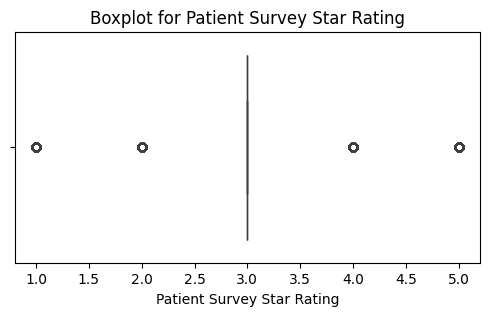

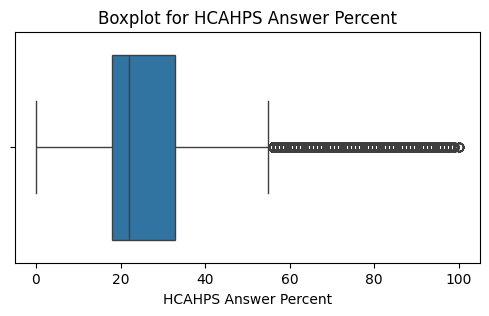

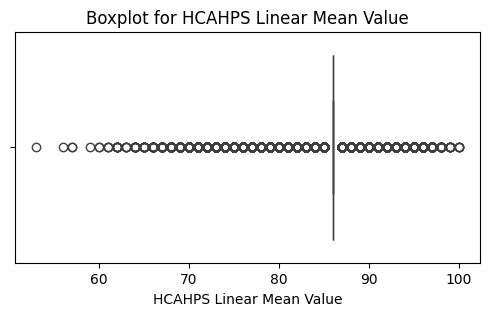

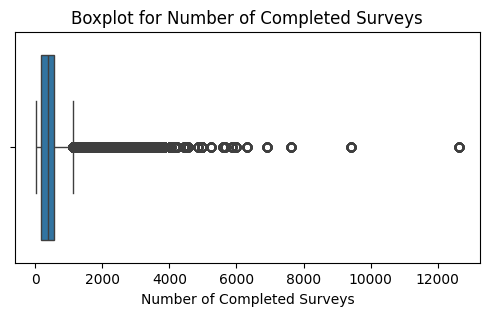

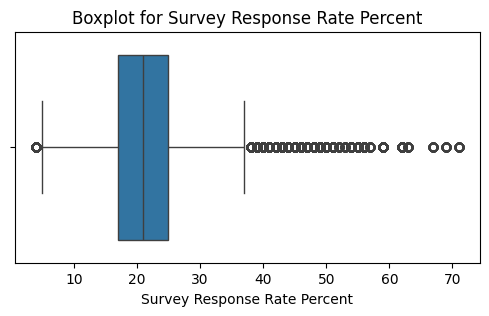

In [61]:
for col3 in cols:
    plt.figure(figsize=(6,3))
    sns.boxplot(x=hcahps[col3])
    plt.title(f"Boxplot for {col3}")
    plt.show()

#####Observation:
We are not going to remove outliers here.Because in healthcare:

i) Outliers often represent real situations, not mistakes

ii) Extreme values may signal critical insights

iii) Removing them would hide true problems or distort findings

## Hospital Gen_Info File Handling

In [62]:
Hosp= pd.read_csv("/content/Hospital_General_Information.csv")

In [63]:
Hosp.head()

,Facility ID,Facility Name,Address,City/Town,State,ZIP Code,County/Parish,Telephone Number,Hospital Type,Hospital Ownership,Emergency Services,Meets criteria for birthing friendly designation,Hospital overall rating,Hospital overall rating footnote,MORT Group Measure Count,Count of Facility MORT Measures,Count of MORT Measures Better,Count of MORT Measures No Different,Count of MORT Measures Worse,MORT Group Footnote,Safety Group Measure Count,Count of Facility Safety Measures,Count of Safety Measures Better,Count of Safety Measures No Different,Count of Safety Measures Worse,Safety Group Footnote,READM Group Measure Count,Count of Facility READM Measures,Count of READM Measures Better,Count of READM Measures No Different,Count of READM Measures Worse,READM Group Footnote,Pt Exp Group Measure Count,Count of Facility Pt Exp Measures,Pt Exp Group Footnote,TE Group Measure Count,Count of Facility TE Measures,TE Group Footnote
0,010001,SOUTHEAST HEALTH MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,(334) 793-8701,Acute Care Hospitals,Government - Hospital District or Authority,Yes,Y,4,NaN,7,7,0,7,0,NaN,8,7,3,4,0,NaN,11,11,0,11,0,NaN,8,8,NaN,12,11,NaN
1,010005,MARSHALL MEDICAL CENTERS,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,MARSHALL,(256) 593-8310,Acute Care Hospitals,Government - Hospital District or Authority,Yes,Y,3,NaN,7,6,0,5,1,NaN,8,7,0,7,0,NaN,11,9,0,8,1,NaN,8,8,NaN,12,12,NaN
2,010006,NORTH ALABAMA MEDICAL CENTER,1701 VETERANS DRIVE,FLORENCE,AL,35630,LAUDERDALE,(256) 768-8400,Acute Care Hospitals,Proprietary,Yes,Y,2,NaN,7,7,0,5,2,NaN,8,8,3,5,0,NaN,11,9,0,8,1,NaN,8,8,NaN,12,10,NaN
3,010007,MIZELL MEMORIAL HOSPITAL,702 N MAIN ST,OPP,AL,36467,COVINGTON,(334) 493-3541,Acute Care Hospitals,Voluntary non-profit - Private,Yes,NaN,1,NaN,7,3,0,2,1,NaN,8,3,0,3,0,NaN,11,7,0,7,0,NaN,8,8,NaN,12,7,NaN
4,010008,CRENSHAW COMMUNITY HOSPITAL,101 HOSPITAL CIRCLE,LUVERNE,AL,36049,CRENSHAW,(334) 335-3374,Acute Care Hospitals,Proprietary,Yes,NaN,Not Available,16,7,1,0,1,0,NaN,8,Not Available,Not Available,Not Available,Not Available,5.0,11,2,0,2,0,NaN,8,Not Available,5.0,12,6,NaN


In [64]:
Hosp.shape

(5421, 38)

In [65]:
Hosp.isnull().sum()

,0
Facility ID,0
Facility Name,0
Address,0
City/Town,0
State,0
ZIP Code,0
County/Parish,0
Telephone Number,0
Hospital Type,0
Hospital Ownership,0


In [66]:
Hosp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5421 entries, 0 to 5420
Data columns (total 38 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Facility ID                                       5421 non-null   object 
 1   Facility Name                                     5421 non-null   object 
 2   Address                                           5421 non-null   object 
 3   City/Town                                         5421 non-null   object 
 4   State                                             5421 non-null   object 
 5   ZIP Code                                          5421 non-null   int64  
 6   County/Parish                                     5421 non-null   object 
 7   Telephone Number                                  5421 non-null   object 
 8   Hospital Type                                     5421 non-null   object 
 9   Hospital Ownership 

In [67]:
clmn=Hosp.columns[12:]
Hosp[clmn] = Hosp[clmn].apply(pd.to_numeric, errors='coerce')

In [68]:
Hosp.drop(columns=['Hospital overall rating footnote','MORT Group Footnote',
                   'Safety Group Footnote','READM Group Footnote','TE Group Footnote'],inplace=True)

In [69]:
Hosp[Hosp.duplicated()].shape

(0, 33)

#### Null Handling

In [70]:
Hosp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5421 entries, 0 to 5420
Data columns (total 33 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Facility ID                                       5421 non-null   object 
 1   Facility Name                                     5421 non-null   object 
 2   Address                                           5421 non-null   object 
 3   City/Town                                         5421 non-null   object 
 4   State                                             5421 non-null   object 
 5   ZIP Code                                          5421 non-null   int64  
 6   County/Parish                                     5421 non-null   object 
 7   Telephone Number                                  5421 non-null   object 
 8   Hospital Type                                     5421 non-null   object 
 9   Hospital Ownership 

In [71]:
Hosp.isnull().sum()

,0
Facility ID,0
Facility Name,0
Address,0
City/Town,0
State,0
ZIP Code,0
County/Parish,0
Telephone Number,0
Hospital Type,0
Hospital Ownership,0


<Axes: >

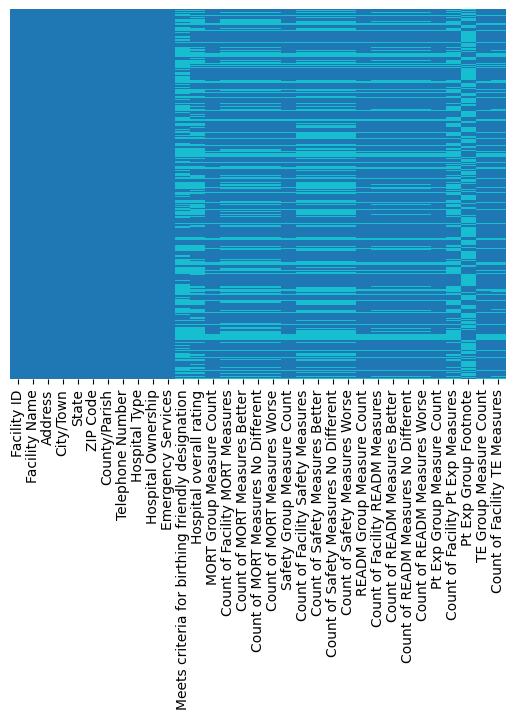

In [72]:
sns.heatmap(Hosp.isnull(),yticklabels=False,cbar=False,cmap='tab10')

In [73]:
Clm =Hosp.columns[12:]
for cl in Clm:
  Hosp[cl]=Hosp[cl].fillna(Hosp[cl].median())

In [74]:
Hosp.isnull().sum()

,0
Facility ID,0
Facility Name,0
Address,0
City/Town,0
State,0
ZIP Code,0
County/Parish,0
Telephone Number,0
Hospital Type,0
Hospital Ownership,0


###Outlier Detection

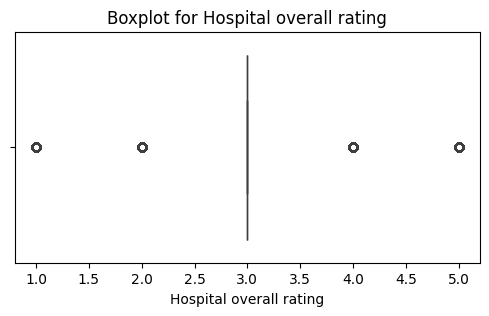

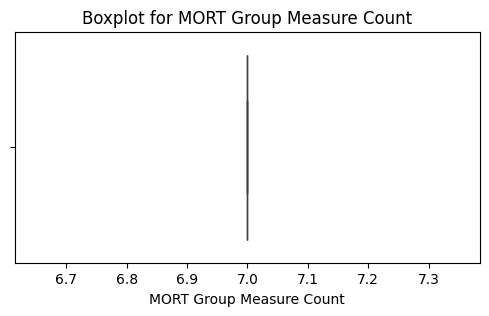

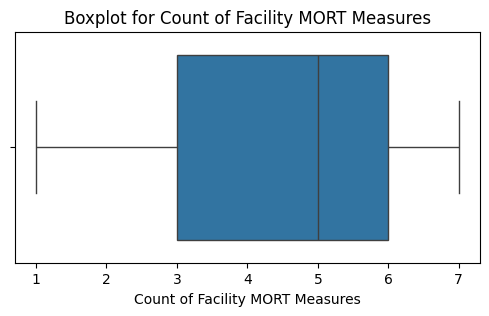

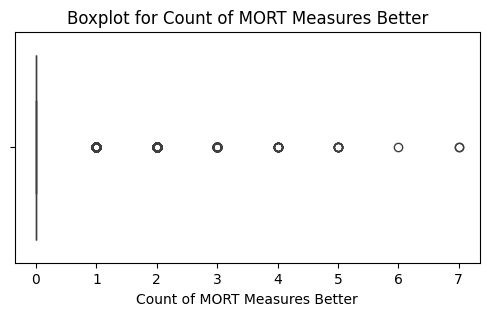

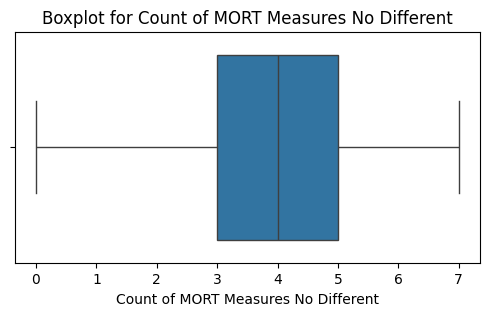

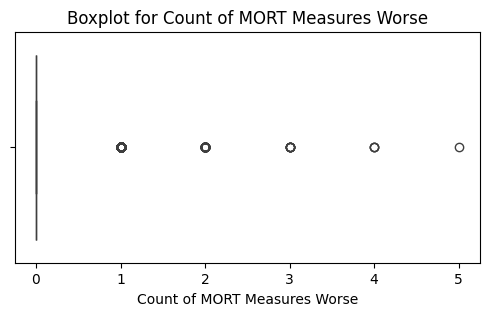

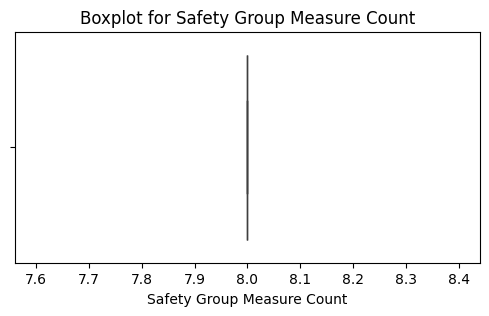

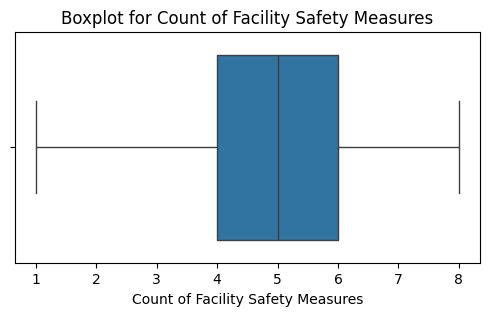

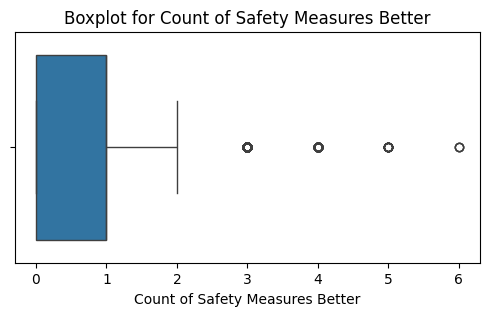

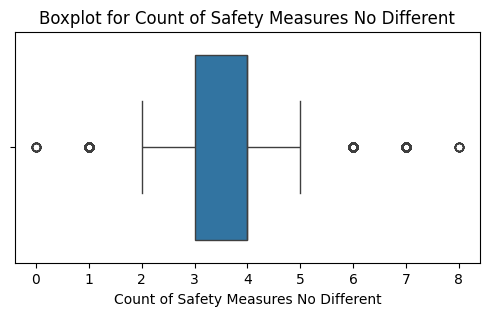

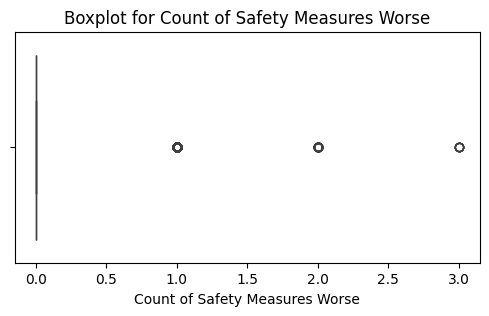

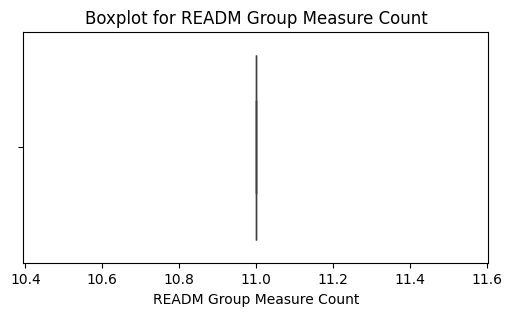

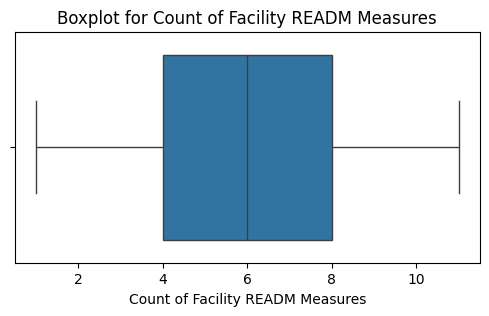

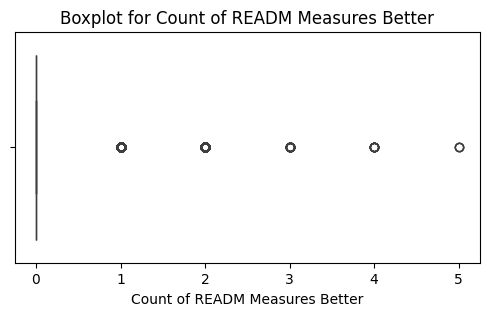

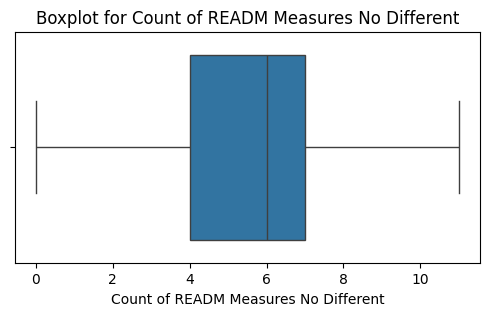

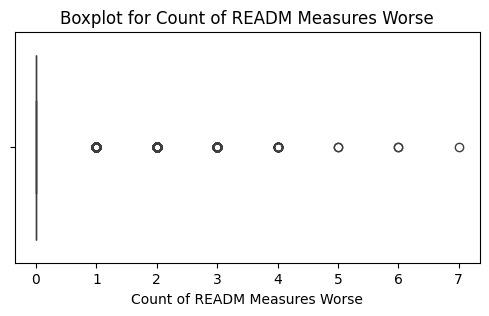

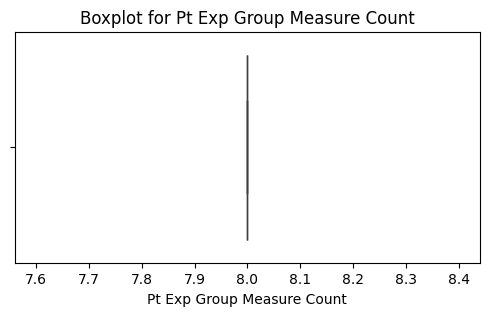

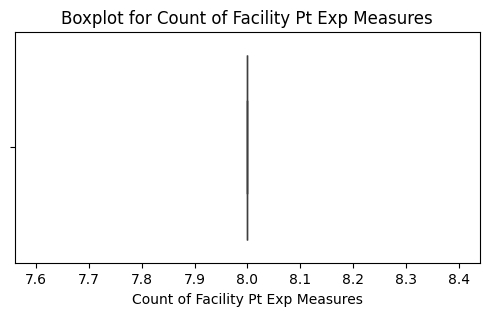

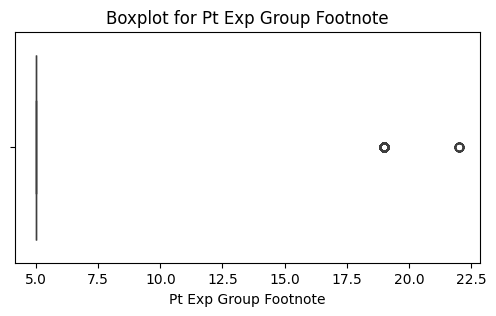

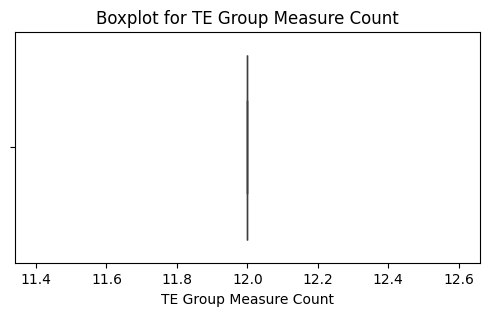

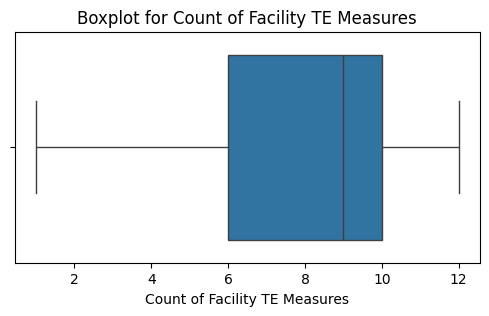

In [75]:
for cl in Clm:
  plt.figure(figsize=(6,3))
  sns.boxplot(x=Hosp[cl])
  plt.title(f"Boxplot for {cl}")
  plt.show()

## Complications File Handling

In [76]:
comp = pd.read_csv('/content/Complications_and_Deaths-Hospital.csv')

In [77]:
comp.head()

,Facility ID,Facility Name,Address,City/Town,State,ZIP Code,County/Parish,Telephone Number,Measure ID,Measure Name,Compared to National,Denominator,Score,Lower Estimate,Higher Estimate,Footnote,Start Date,End Date
0,010001,SOUTHEAST HEALTH MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,(334) 793-8701,COMP_HIP_KNEE,Rate of complications for hip/knee replacement...,No Different Than the National Rate,27,3.2,1.7,5.9,NaN,04/01/2021,03/31/2024
1,010001,SOUTHEAST HEALTH MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,(334) 793-8701,Hybrid_HWM,Hybrid Hospital-Wide All-Cause Risk Standardiz...,No Different Than the National Rate,1835,4.5,2.6,7.4,NaN,07/01/2023,06/30/2024
2,010001,SOUTHEAST HEALTH MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,(334) 793-8701,MORT_30_AMI,Death rate for heart attack patients,No Different Than the National Rate,270,11.4,9.1,14.3,NaN,07/01/2021,06/30/2024
3,010001,SOUTHEAST HEALTH MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,(334) 793-8701,MORT_30_CABG,Death rate for CABG surgery patients,No Different Than the National Rate,144,3,1.6,5.8,NaN,07/01/2021,06/30/2024
4,010001,SOUTHEAST HEALTH MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,(334) 793-8701,MORT_30_COPD,Death rate for COPD patients,No Different Than the National Rate,112,9.4,6.4,13.6,NaN,07/01/2021,06/30/2024


In [78]:
comp.shape

(95820, 18)

In [79]:
comp[comp.duplicated].shape

(0, 18)

In [80]:
comp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95820 entries, 0 to 95819
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Facility ID           95820 non-null  object
 1   Facility Name         95820 non-null  object
 2   Address               95820 non-null  object
 3   City/Town             95820 non-null  object
 4   State                 95820 non-null  object
 5   ZIP Code              95820 non-null  int64 
 6   County/Parish         95820 non-null  object
 7   Telephone Number      95820 non-null  object
 8   Measure ID            95820 non-null  object
 9   Measure Name          95820 non-null  object
 10  Compared to National  95820 non-null  object
 11  Denominator           95820 non-null  object
 12  Score                 95820 non-null  object
 13  Lower Estimate        95820 non-null  object
 14  Higher Estimate       95820 non-null  object
 15  Footnote              44867 non-null

In [81]:
comp.isnull().sum()

,0
Facility ID,0
Facility Name,0
Address,0
City/Town,0
State,0
ZIP Code,0
County/Parish,0
Telephone Number,0
Measure ID,0
Measure Name,0


In [82]:
comp.drop('Footnote',inplace=True,axis=1)

In [83]:
colu = comp.columns[11:15]
comp[colu] = comp[colu].apply(pd.to_numeric, errors='coerce')

In [84]:
comp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95820 entries, 0 to 95819
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Facility ID           95820 non-null  object 
 1   Facility Name         95820 non-null  object 
 2   Address               95820 non-null  object 
 3   City/Town             95820 non-null  object 
 4   State                 95820 non-null  object 
 5   ZIP Code              95820 non-null  int64  
 6   County/Parish         95820 non-null  object 
 7   Telephone Number      95820 non-null  object 
 8   Measure ID            95820 non-null  object 
 9   Measure Name          95820 non-null  object 
 10  Compared to National  95820 non-null  object 
 11  Denominator           49256 non-null  float64
 12  Score                 52179 non-null  float64
 13  Lower Estimate        52179 non-null  float64
 14  Higher Estimate       52179 non-null  float64
 15  Start Date         

<Axes: >

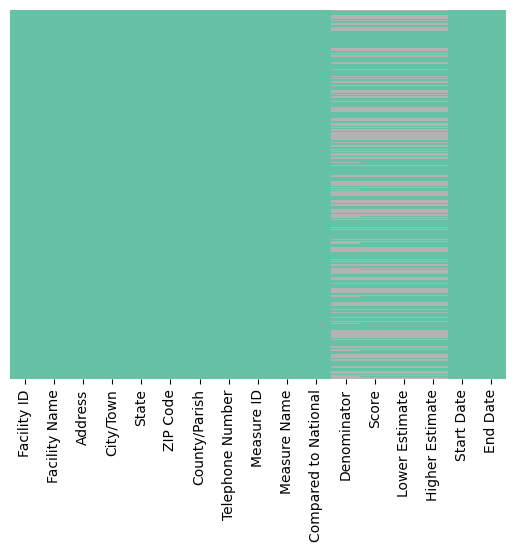

In [85]:
sns.heatmap(comp.isnull(),yticklabels=False,cbar=False,cmap='Set2')

In [86]:
for c in colu:
  comp[c]=comp[c].fillna(comp[c].median())

In [87]:
comp.isnull().sum()

,0
Facility ID,0
Facility Name,0
Address,0
City/Town,0
State,0
ZIP Code,0
County/Parish,0
Telephone Number,0
Measure ID,0
Measure Name,0


#### Outlier Detection:

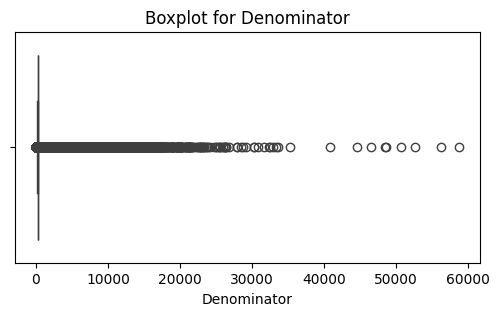

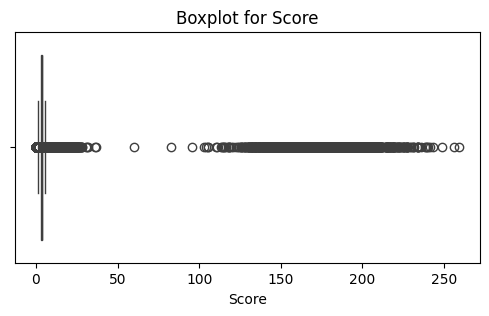

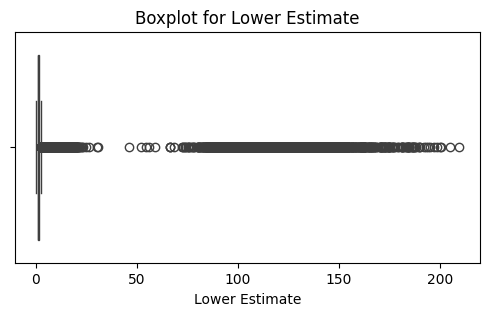

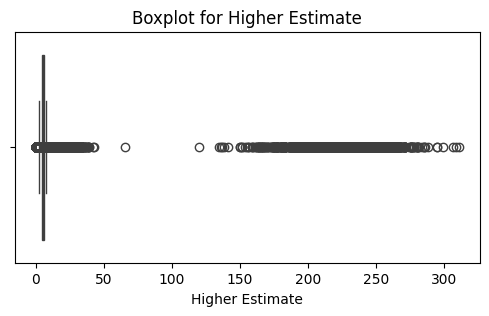

In [88]:
for c in colu:
  plt.figure(figsize=(6,3))
  sns.boxplot(x=comp[c])
  plt.title(f"Boxplot for {c}")
  plt.show()

In [89]:
### Notes : Due to the presence of Hospital details in all the tables -> Going to do Normalization

In [90]:
hosp_dim = Hosp[['Facility ID','Facility Name','Address','City/Town',
                         'State','ZIP Code','County/Parish','Telephone Number']].drop_duplicates()


In [91]:
hosp_dim.shape

(5421, 8)

In [92]:
hosp_dim['Facility ID'].nunique()

5421

In [122]:
### Observation: "Facility ID" doen't have any null values, So we can use it as a common column to connect.

### Normalization:

In [94]:
drop_cols = ['Facility Name','Address','City/Town','State',
             'ZIP Code','County/Parish','Telephone Number']
for df in [hcahps,Hosp,comp]:
  df.drop(columns=drop_cols,inplace=True)


In [95]:
hcahps.columns

Index(['Facility ID', 'HCAHPS Measure ID', 'HCAHPS Question',
       'HCAHPS Answer Description', 'Patient Survey Star Rating',
       'HCAHPS Answer Percent', 'HCAHPS Linear Mean Value',
       'Number of Completed Surveys', 'Survey Response Rate Percent',
       'Start Date', 'End Date'],
      dtype='object')

###Insights and visualization:

In [96]:
hcahps.head(2)

,Facility ID,HCAHPS Measure ID,HCAHPS Question,HCAHPS Answer Description,Patient Survey Star Rating,HCAHPS Answer Percent,HCAHPS Linear Mean Value,Number of Completed Surveys,Survey Response Rate Percent,Start Date,End Date
0,010001,H_COMP_1_A_P,"Patients who reported that their nurses ""Alway...","Nurses ""always"" communicated well",3.0,75.0,86.0,627.0,17.0,01/01/2024,12/31/2024
1,010001,H_COMP_1_SN_P,"Patients who reported that their nurses ""Somet...","Nurses ""sometimes"" or ""never"" communicated well",3.0,6.0,86.0,627.0,17.0,01/01/2024,12/31/2024


In [97]:
hcahps['HCAHPS Question'].nunique()

93

In [123]:
# hcahps[hcahps["Facility ID"] == "010001"]

In [99]:
hcahps.tail()

,Facility ID,HCAHPS Measure ID,HCAHPS Question,HCAHPS Answer Description,Patient Survey Star Rating,HCAHPS Answer Percent,HCAHPS Linear Mean Value,Number of Completed Surveys,Survey Response Rate Percent,Start Date,End Date
445558,671301,H_RECMND_DY,"Patients who reported YES, they would definite...","""YES"", patients would definitely recommend the...",3.0,22.0,86.0,376.5,21.0,01/01/2024,12/31/2024
445559,671301,H_RECMND_PY,"Patients who reported YES, they would probably...","""YES"", patients would probably recommend the h...",3.0,22.0,86.0,376.5,21.0,01/01/2024,12/31/2024
445560,671301,H_RECMND_LINEAR_SCORE,Recommend hospital - linear mean score,Recommend hospital - linear mean score,3.0,22.0,86.0,376.5,21.0,01/01/2024,12/31/2024
445561,671301,H_RECMND_STAR_RATING,Recommend hospital - star rating,Recommend hospital - star rating,3.0,22.0,86.0,376.5,21.0,01/01/2024,12/31/2024
445562,671301,H_STAR_RATING,Summary star rating,Summary star rating,3.0,22.0,86.0,376.5,21.0,01/01/2024,12/31/2024


In [100]:
hcahps['HCAHPS Measure ID'].nunique()

93

#### Observation:
 From this we got to know that each 'Facility ID' had atmax of 93 Distinct Questions on survey.

#### HCAHPS Star Rating Distribution

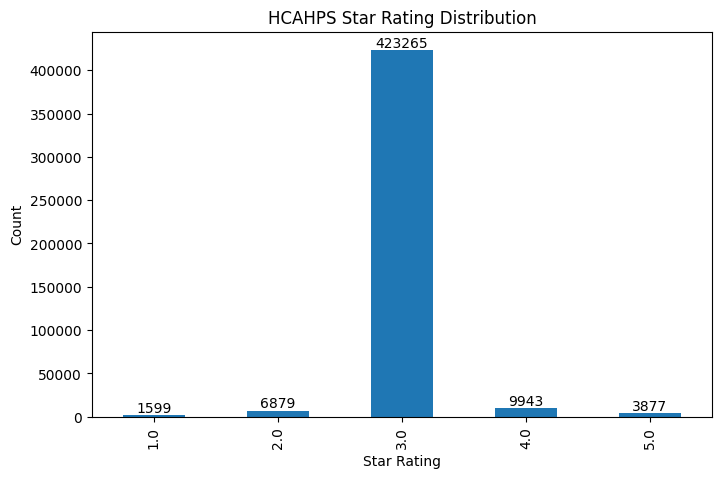

In [101]:
rating_counts = hcahps["Patient Survey Star Rating"].value_counts().sort_index()

plt.figure(figsize=(8,5))
ax= rating_counts.plot(kind='bar')
plt.title("HCAHPS Star Rating Distribution")
plt.xlabel("Star Rating")
plt.ylabel("Count")

for i in ax.containers:
    ax.bar_label(i)

plt.show()

In [102]:
hcahps.describe()

,Patient Survey Star Rating,HCAHPS Answer Percent,HCAHPS Linear Mean Value,Number of Completed Surveys,Survey Response Rate Percent
count,445563.000000,445563.000000,445563.000000,445563.000000,445563.000000
mean,3.017102,29.727792,85.948571,509.956481,22.002713
std,0.294317,23.413649,1.627458,635.465414,7.805713
min,1.000000,0.000000,53.000000,25.000000,4.000000
25%,3.000000,18.000000,86.000000,169.000000,17.000000
50%,3.000000,22.000000,86.000000,376.500000,21.000000
75%,3.000000,33.000000,86.000000,548.000000,25.000000
max,5.000000,100.000000,100.000000,12627.000000,71.000000


In [103]:
hosp_dim.head()

,Facility ID,Facility Name,Address,City/Town,State,ZIP Code,County/Parish,Telephone Number
0,010001,SOUTHEAST HEALTH MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,(334) 793-8701
1,010005,MARSHALL MEDICAL CENTERS,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,MARSHALL,(256) 593-8310
2,010006,NORTH ALABAMA MEDICAL CENTER,1701 VETERANS DRIVE,FLORENCE,AL,35630,LAUDERDALE,(256) 768-8400
3,010007,MIZELL MEMORIAL HOSPITAL,702 N MAIN ST,OPP,AL,36467,COVINGTON,(334) 493-3541
4,010008,CRENSHAW COMMUNITY HOSPITAL,101 HOSPITAL CIRCLE,LUVERNE,AL,36049,CRENSHAW,(334) 335-3374


In [104]:
hosp_dim['State'].nunique()

56

####Top 10 & Bottom 10 States by rating

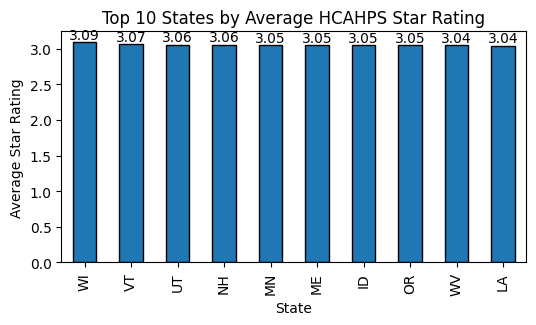

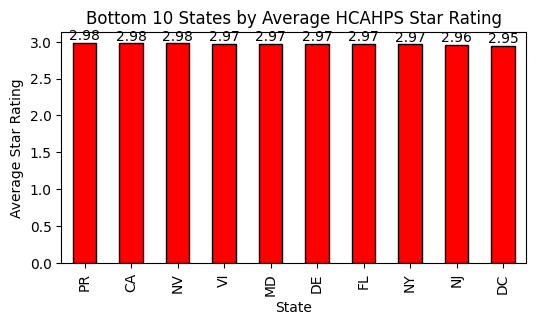

In [105]:
merged = hcahps.merge(hosp_dim[["Facility ID", "State"]], on="Facility ID", how="left")
# Calculate state average rating
state_avg = merged.groupby("State")["Patient Survey Star Rating"].mean().sort_values(ascending=False)

# Split into Top 10 & Bottom 10
top_10 = state_avg.head(10)
bottom_10 = state_avg.tail(10)

# ---- Plot Top 10 -----
plt.figure(figsize=(6,3))
ax = top_10.plot(kind='bar', edgecolor='black')
plt.title("Top 10 States by Average HCAHPS Star Rating")
plt.xlabel("State")
plt.ylabel("Average Star Rating")

for container in ax.containers:
    ax.bar_label(container,fmt='%.2f')

plt.show()

# ---- Plot Bottom 10 -----
plt.figure(figsize=(6,3))
ax2 = bottom_10.plot(kind='bar', edgecolor='black', color='red')
plt.title("Bottom 10 States by Average HCAHPS Star Rating")
plt.xlabel("State")
plt.ylabel("Average Star Rating")

for container in ax2.containers:
    ax2.bar_label(container,fmt='%.2f')

plt.show()

#### Survey Response Rate vs Star Rating

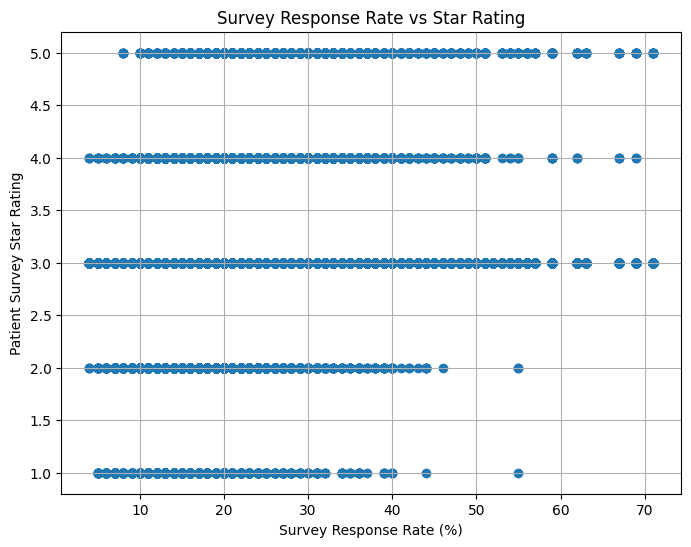

In [106]:
plt.figure(figsize=(8,6))

plt.scatter(
    merged["Survey Response Rate Percent"],
    merged["Patient Survey Star Rating"]
)

plt.title("Survey Response Rate vs Star Rating")
plt.xlabel("Survey Response Rate (%)")
plt.ylabel("Patient Survey Star Rating")

plt.grid(True)
plt.show()

#### Top 5 Hospitals by Rating

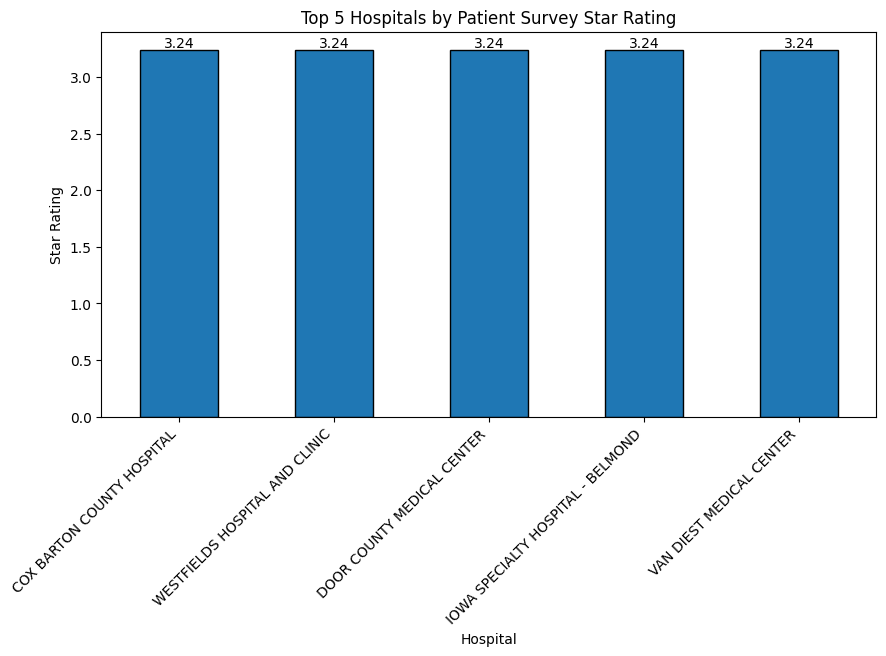

In [107]:
merged1 = hcahps.merge(hosp_dim[["Facility ID", "Facility Name"]], on="Facility ID", how="left")
# Top 5 hospitals by star rating
Hos_avg = merged1.groupby("Facility Name")["Patient Survey Star Rating"].mean().sort_values(ascending=False).head(5)

plt.figure(figsize=(10,5))
ax = Hos_avg.plot(
    kind='bar',
    edgecolor='black')
plt.title("Top 5 Hospitals by Patient Survey Star Rating")
plt.xlabel("Hospital")
plt.ylabel("Star Rating")
plt.xticks(rotation=45, ha='right')

for con in ax.containers:
    ax.bar_label(con, fmt="%.2f")

plt.show()

In [108]:
Hosp.head()

,Facility ID,Hospital Type,Hospital Ownership,Emergency Services,Meets criteria for birthing friendly designation,Hospital overall rating,MORT Group Measure Count,Count of Facility MORT Measures,Count of MORT Measures Better,Count of MORT Measures No Different,Count of MORT Measures Worse,Safety Group Measure Count,Count of Facility Safety Measures,Count of Safety Measures Better,Count of Safety Measures No Different,Count of Safety Measures Worse,READM Group Measure Count,Count of Facility READM Measures,Count of READM Measures Better,Count of READM Measures No Different,Count of READM Measures Worse,Pt Exp Group Measure Count,Count of Facility Pt Exp Measures,Pt Exp Group Footnote,TE Group Measure Count,Count of Facility TE Measures
0,010001,Acute Care Hospitals,Government - Hospital District or Authority,Yes,Y,4.0,7.0,7.0,0.0,7.0,0.0,8.0,7.0,3.0,4.0,0.0,11.0,11.0,0.0,11.0,0.0,8.0,8.0,5.0,12.0,11.0
1,010005,Acute Care Hospitals,Government - Hospital District or Authority,Yes,Y,3.0,7.0,6.0,0.0,5.0,1.0,8.0,7.0,0.0,7.0,0.0,11.0,9.0,0.0,8.0,1.0,8.0,8.0,5.0,12.0,12.0
2,010006,Acute Care Hospitals,Proprietary,Yes,Y,2.0,7.0,7.0,0.0,5.0,2.0,8.0,8.0,3.0,5.0,0.0,11.0,9.0,0.0,8.0,1.0,8.0,8.0,5.0,12.0,10.0
3,010007,Acute Care Hospitals,Voluntary non-profit - Private,Yes,NaN,1.0,7.0,3.0,0.0,2.0,1.0,8.0,3.0,0.0,3.0,0.0,11.0,7.0,0.0,7.0,0.0,8.0,8.0,5.0,12.0,7.0
4,010008,Acute Care Hospitals,Proprietary,Yes,NaN,3.0,7.0,1.0,0.0,1.0,0.0,8.0,5.0,1.0,4.0,0.0,11.0,2.0,0.0,2.0,0.0,8.0,8.0,5.0,12.0,6.0


In [109]:
comp.head()

,Facility ID,Measure ID,Measure Name,Compared to National,Denominator,Score,Lower Estimate,Higher Estimate,Start Date,End Date
0,010001,COMP_HIP_KNEE,Rate of complications for hip/knee replacement...,No Different Than the National Rate,27.0,3.2,1.7,5.9,04/01/2021,03/31/2024
1,010001,Hybrid_HWM,Hybrid Hospital-Wide All-Cause Risk Standardiz...,No Different Than the National Rate,1835.0,4.5,2.6,7.4,07/01/2023,06/30/2024
2,010001,MORT_30_AMI,Death rate for heart attack patients,No Different Than the National Rate,270.0,11.4,9.1,14.3,07/01/2021,06/30/2024
3,010001,MORT_30_CABG,Death rate for CABG surgery patients,No Different Than the National Rate,144.0,3.0,1.6,5.8,07/01/2021,06/30/2024
4,010001,MORT_30_COPD,Death rate for COPD patients,No Different Than the National Rate,112.0,9.4,6.4,13.6,07/01/2021,06/30/2024


In [110]:
comp.shape

(95820, 10)

In [111]:
comp[['Measure ID','Measure Name']].nunique()

,0
Measure ID,20
Measure Name,20


In [112]:
## Helps to identify the reasons behind the deaths in different hospitals
comp[['Measure ID','Measure Name']].value_counts()


,,count
Measure ID,Measure Name,
COMP_HIP_KNEE,Rate of complications for hip/knee replacement patients,4791
Hybrid_HWM,Hybrid Hospital-Wide All-Cause Risk Standardized Mortality Rate,4791
MORT_30_AMI,Death rate for heart attack patients,4791
MORT_30_CABG,Death rate for CABG surgery patients,4791
MORT_30_COPD,Death rate for COPD patients,4791
MORT_30_HF,Death rate for heart failure patients,4791
MORT_30_PN,Death rate for pneumonia patients,4791
MORT_30_STK,Death rate for stroke patients,4791
PSI_03,Pressure ulcer rate,4791


#### Distribution of No.Of Hospitals by comparison with National Rate

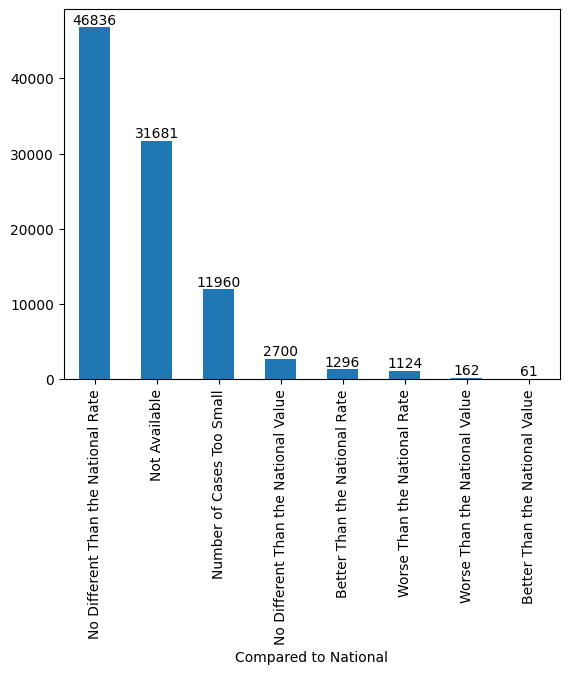

In [113]:
bx= comp['Compared to National'].value_counts().plot(kind='bar')
for i in bx.containers:
    bx.bar_label(i)
plt.show()

#### Average Patient sample Volume Across Complication Measures

In [114]:
### Helps to understanding reliability and impact based on sample size used in performance measurement

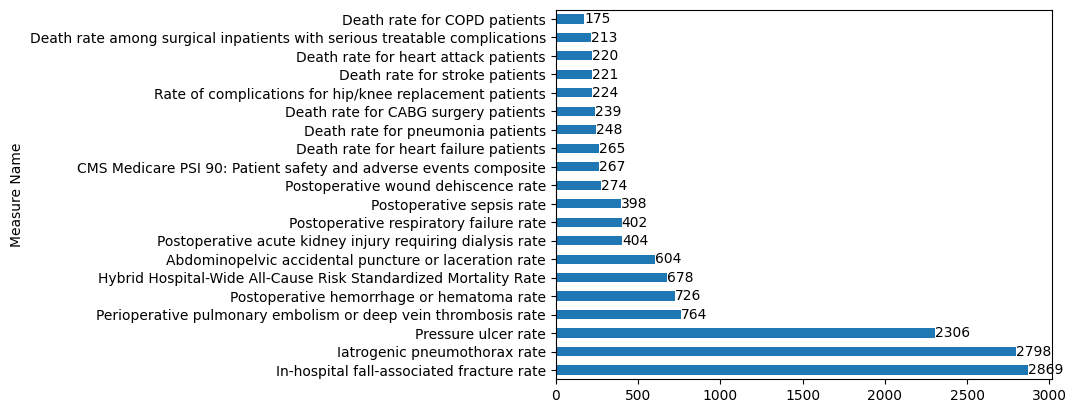

In [115]:
cx=comp.groupby('Measure Name')['Denominator'].mean().round().sort_values(ascending=False).plot(kind='barh')
for i in cx.containers:
    cx.bar_label(i)
plt.show()

#### Best_2 & Worst_2 Hospitals for each Complication Measures

In [116]:
##Higher Score   -- More complications/deaths  → worse hospital
##Lower Score    -- Better performance         → safer hospital

In [117]:
top2 = (comp.merge(hosp_dim, on='Facility ID')
            .sort_values(['Measure Name','Score'], ascending=[True, True])
            .groupby('Measure Name')
            .head(2))
top2['Rank'] = top2.groupby('Measure Name').cumcount() + 1

top2[['Measure Name','Rank','Facility ID','Facility Name','Score']]

,Measure Name,Rank,Facility ID,Facility Name,Score
57358,Abdominopelvic accidental puncture or lacerati...,1,330101,NEW YORK-PRESBYTERIAN HOSPITAL,0.35
3078,Abdominopelvic accidental puncture or lacerati...,2,030103,MAYO CLINIC HOSPITAL,0.36
57359,CMS Medicare PSI 90: Patient safety and advers...,1,330101,NEW YORK-PRESBYTERIAN HOSPITAL,0.40
95219,CMS Medicare PSI 90: Patient safety and advers...,2,670122,HOUSTON METHODIST THE WOODLANDS HOSPITAL,0.55
69,Death rate among surgical inpatients with seri...,1,010007,MIZELL MEMORIAL HOSPITAL,3.43
89,Death rate among surgical inpatients with seri...,2,010008,CRENSHAW COMMUNITY HOSPITAL,3.43
40143,Death rate for CABG surgery patients,1,220071,MASSACHUSETTS GENERAL HOSPITAL,1.00
64663,Death rate for CABG surgery patients,2,360180,CLEVELAND CLINIC,1.00
84,Death rate for COPD patients,1,010008,CRENSHAW COMMUNITY HOSPITAL,3.43
164,Death rate for COPD patients,2,010018,CALLAHAN EYE HOSPITAL,3.43


In [118]:
Bot2 = (comp.merge(hosp_dim, on='Facility ID')
            .sort_values(['Measure Name','Score'], ascending=[True, False])
            .groupby('Measure Name')
            .head(2))
Bot2['Rank'] = Bot2.groupby('Measure Name').cumcount() + 1

Bot2[['Measure Name','Rank','Facility ID','Facility Name','Score']]

,Measure Name,Rank,Facility ID,Facility Name,Score
98,Abdominopelvic accidental puncture or lacerati...,1,010008,CRENSHAW COMMUNITY HOSPITAL,3.43
178,Abdominopelvic accidental puncture or lacerati...,2,010018,CALLAHAN EYE HOSPITAL,3.43
99,CMS Medicare PSI 90: Patient safety and advers...,1,010008,CRENSHAW COMMUNITY HOSPITAL,3.43
239,CMS Medicare PSI 90: Patient safety and advers...,2,010022,FLOYD CHEROKEE MEDICAL CENTER,3.43
70589,Death rate among surgical inpatients with seri...,1,390073,UPMC ALTOONA,259.01
81849,Death rate among surgical inpatients with seri...,2,450686,UNIVERSITY MEDICAL CENTER,255.81
80183,Death rate for CABG surgery patients,1,450231,BSA HOSPITAL,6.50
31183,Death rate for CABG surgery patients,2,170013,HAYS MEDICAL CENTER,6.20
1884,Death rate for COPD patients,1,020006,MAT-SU REGIONAL MEDICAL CENTER,16.50
69724,Death rate for COPD patients,2,381325,GOOD SHEPHERD MEDICAL CENTER,16.50


####Complication & Mortality Rates by State

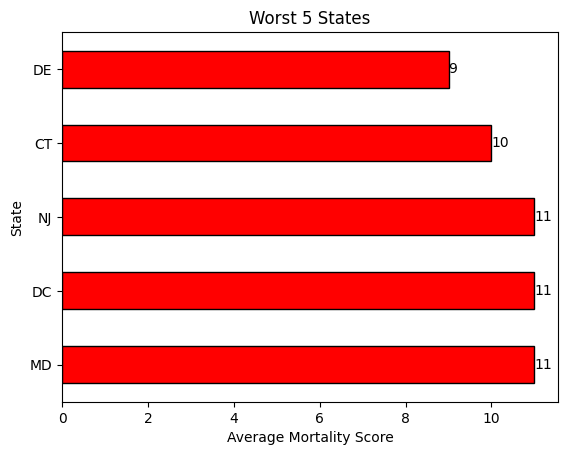

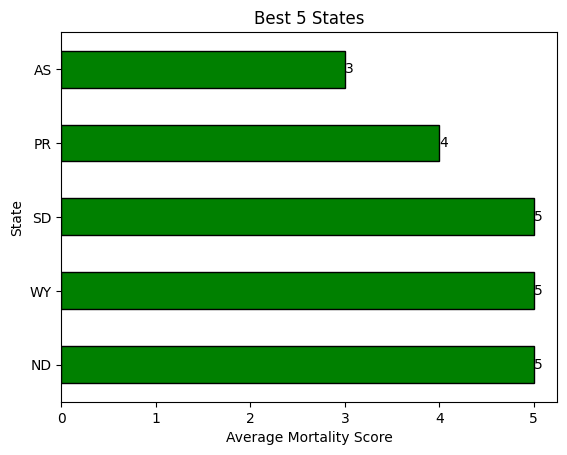

In [119]:
Mrg = comp.merge(hosp_dim, on='Facility ID')
dx=Mrg.groupby('State')['Score'].mean().round().sort_values(ascending=False)

wrst= dx.head(5).plot(kind='barh',edgecolor='black',color='red')
plt.title('Worst 5 States')
plt.xlabel('Average Mortality Score')
plt.ylabel('State')

for i in wrst.containers:
    wrst.bar_label(i)
plt.show()

#--- Best 5 states

bst = dx.tail(5).plot(kind='barh',edgecolor='black',color='green')
plt.title('Best 5 States')
plt.xlabel('Average Mortality Score')
plt.ylabel('State')

for i in bst.containers:
    bst.bar_label(i)
plt.show()
